# 02. 데이터 통계 시각화(seaborn)

**matplotlib**을 이용하여도 대부분의 데이터가 잘 표현되지만, **seaborn** 그래프처럼 시각적으로 보기 좋은 데이터를 만들기는 어렵다.


## 1. seaborn 으로 그래프 그리기

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<`bike.csv`의 설명>
- workingday : 일하는 날인지 여부
- holiday : 휴일인지 여부
- registered : 정기권을 끊은 사람들의 대여 건수
- casual : 정기권을 끊지 않은 사람들의 대여 건수
- total : registered + casual의 총합

In [3]:
df = pd.read_csv("../15_기초통계와_데이터_시각화/15_기초통계와_데이터_시각화-20241030T043232Z-001/15_기초통계와_데이터_시각화/data/bike.csv")
df

,month,day,quarter,day_of_week,workingday,holiday,temperature,humidity,windspeed,registered,casual,total
0,1,1,1Q,SUN,0,0,21.4,72,12,1608,686,2294
1,1,2,1Q,MON,0,1,15.0,44,19,1707,244,1951
2,1,3,1Q,TUE,1,0,7.6,39,23,2147,89,2236
3,1,4,1Q,WED,1,0,0.4,35,11,2273,95,2368
4,1,5,1Q,THU,1,0,14.2,49,6,3132,140,3272
...,...,...,...,...,...,...,...,...,...,...,...,...
361,12,27,4Q,THU,1,0,10.0,83,24,1867,247,2114
362,12,28,4Q,FRI,1,0,14.0,45,10,2451,644,3095
363,12,29,4Q,SAT,0,0,14.9,72,9,1182,159,1341
364,12,30,4Q,SUN,0,0,16.5,54,26,1432,364,1796


In [4]:
df.describe(include='all')

,month,day,quarter,day_of_week,workingday,holiday,temperature,humidity,windspeed,registered,casual,total
count,366.000000,366.000000,366,366,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
unique,NaN,NaN,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,4Q,SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,92,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.513661,15.756831,NaN,NaN,0.683060,0.030055,20.567213,62.445355,12.172131,4581.450820,1018.483607,5599.934426
std,3.455958,8.823592,NaN,NaN,0.465921,0.170971,8.323297,15.177164,7.585884,1424.331846,758.989897,1788.667868
min,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.400000,21.000000,-7.000000,20.000000,2.000000,22.000000
25%,4.000000,8.000000,NaN,NaN,0.000000,0.000000,14.700000,51.000000,7.000000,3730.500000,429.750000,4369.000000
50%,7.000000,16.000000,NaN,NaN,1.000000,0.000000,20.750000,62.000000,11.000000,4776.500000,904.500000,5927.000000
75%,9.750000,23.000000,NaN,NaN,1.000000,0.000000,26.500000,73.000000,17.000000,5663.000000,1262.000000,7011.250000


 - 월별 총 대여 건수의 평균 막대 차트

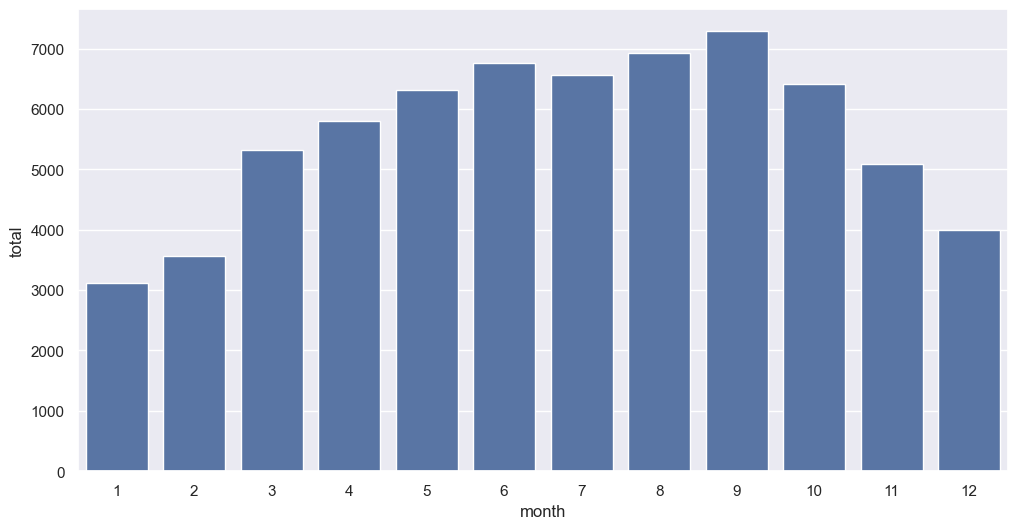

In [9]:
# pandas plot(matplotlib)은 df.plot(x, y, ...)가 있었던 반면,
sns.set_theme(rc={'figure.figsize':(12, 6)})

#rc는 runtime configuration, seaborn의 그래프 기본 설정을 지정하는 딕셔너리 형식의 매개변수
# sns.barplot(x=df['month'], y=df['total'])
sns.barplot(data=df, x='month', y='total', errorbar=None)

# ci(confidence_interval) 신뢰구간을 표시하지 않겠다는 뜻.
plt.show()

 - 월별 **일하는 여부에 따른** 총 대여 건수 막대 차트

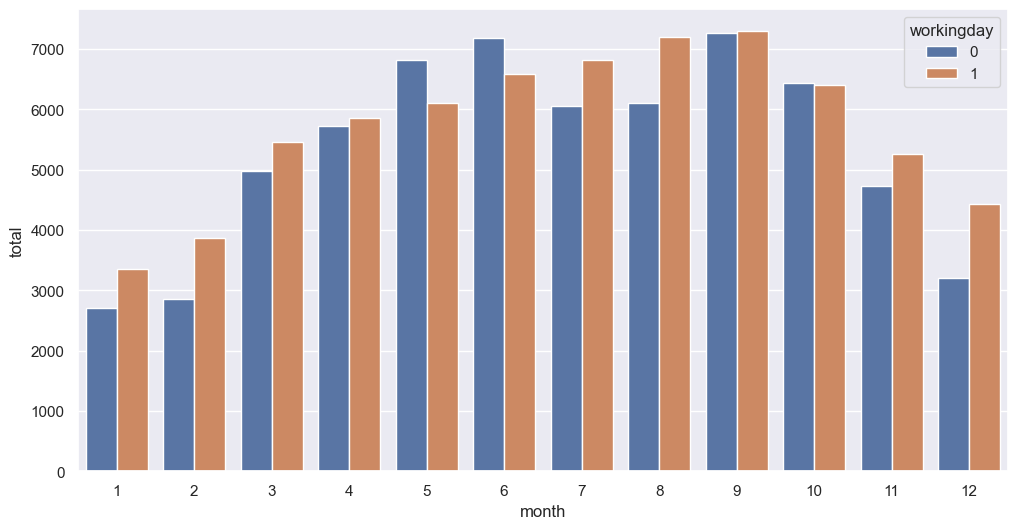

In [10]:
sns.set_theme(rc={'figure.figsize':(12, 6)})
sns.barplot(data=df, x='month', y='total', errorbar=None, hue='workingday')

plt.show()


- 월별 일하는 여부에 따른 정기권을 끊은 사람들의 대여 건수 막대 차트

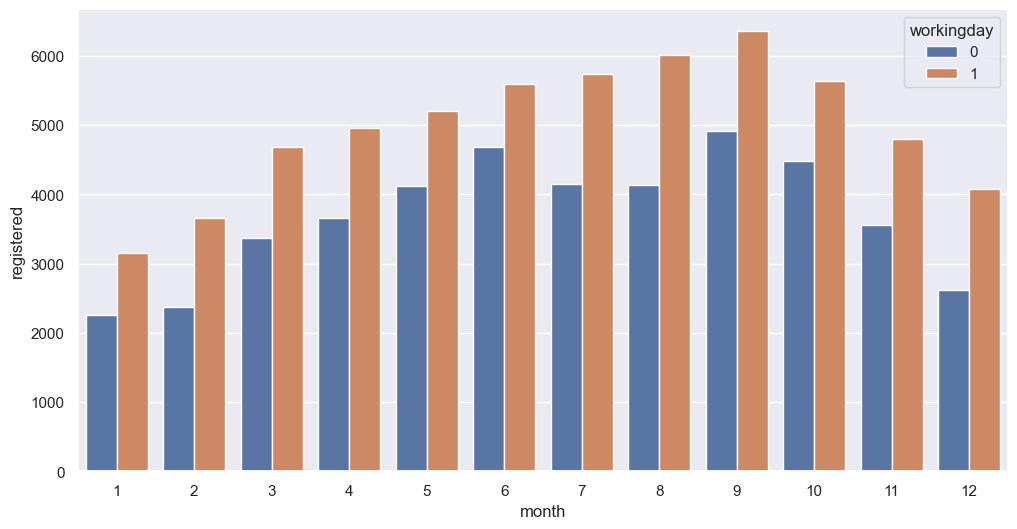

In [14]:
sns.set_theme(rc={'figure.figsize':(12, 6)})
sns.barplot(data=df, x='month', y='registered', errorbar=None, hue='workingday')

plt.show()
# 정기권을 신청한 사람들은 평일에 더 많이 사용하는 것을 알 수 있다.

- 월별 일하는 여부에 따른 정기권을 끊지 않은 사람들의 대여 건수 막대 차트

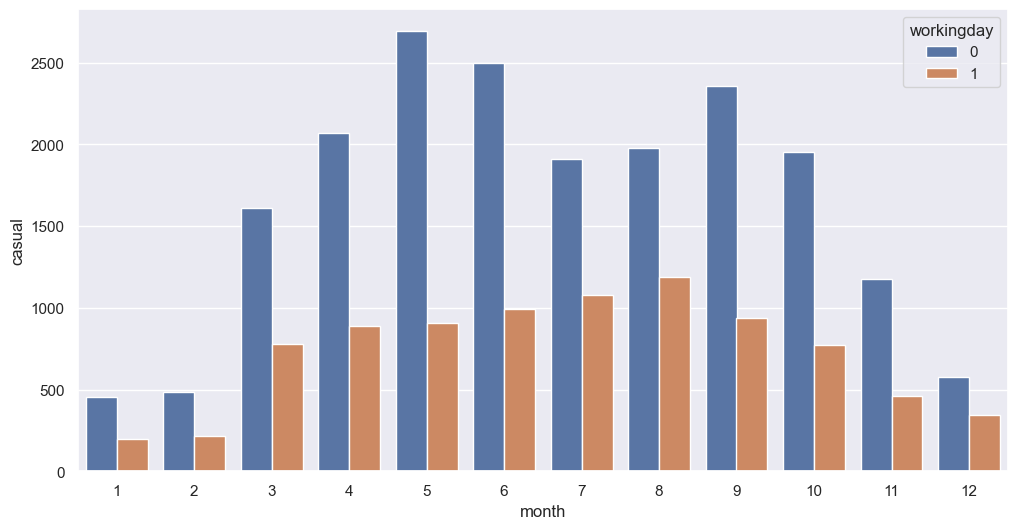

In [15]:
sns.set_theme(rc={'figure.figsize':(12, 6)})
sns.barplot(data=df, x='month', y='casual', errorbar=None, hue='workingday')

plt.show()
# 정기권을 사용하지 않고 일일권을 사용하는 사람들은 주말에 더 많이 사용한다.

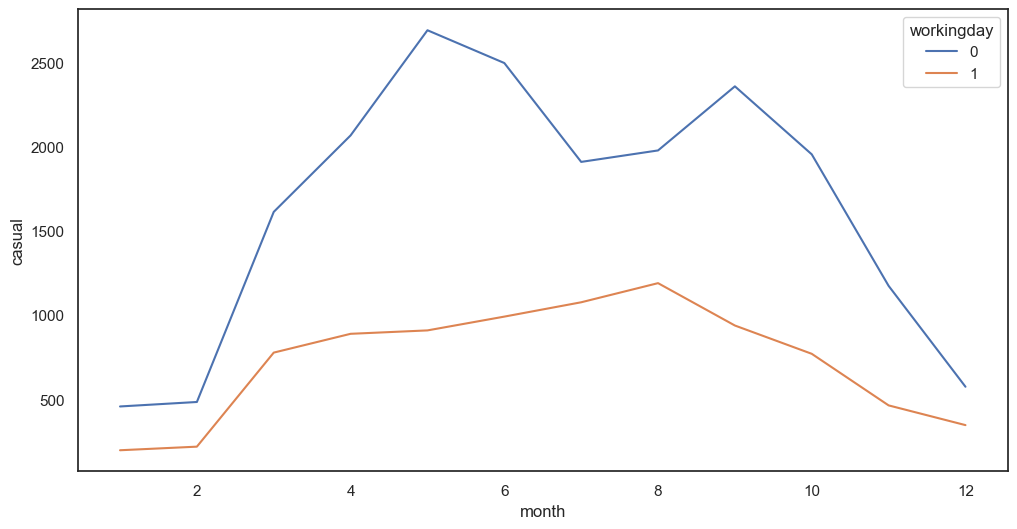

In [17]:
sns.set_theme(rc={'figure.figsize':(12, 6)}, style='white')
sns.lineplot(data=df, x='month', y='casual', errorbar=None, hue='workingday')

plt.show()


# (심화학습) set_theme() 함수로 그래프 커스터마이징하기

### 1. 기본 set_theme()
- 기본값은 darkgrid로, `그래프 배경이 흰 가로선이 있는 회색 배경` 설정됨.
    - 기본 style : 'darkgrid'로 설정되어 있기 때문이다.

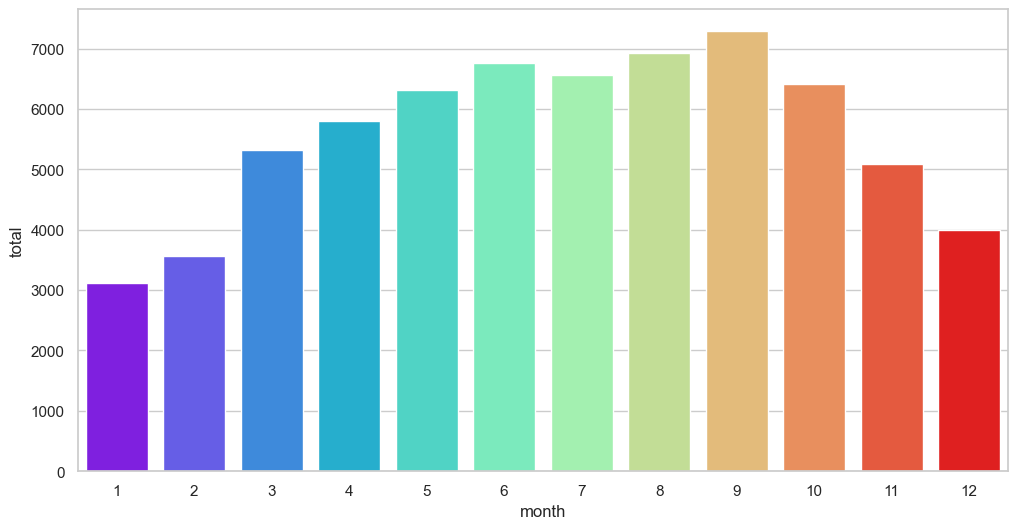

In [29]:
sns.set_theme(style='whitegrid') # style='white','whitegrid','dark','darkgird'
sns.barplot(data=df, x='month', y='total', errorbar=None, hue='month', palette='rainbow', legend=False)
plt.show()

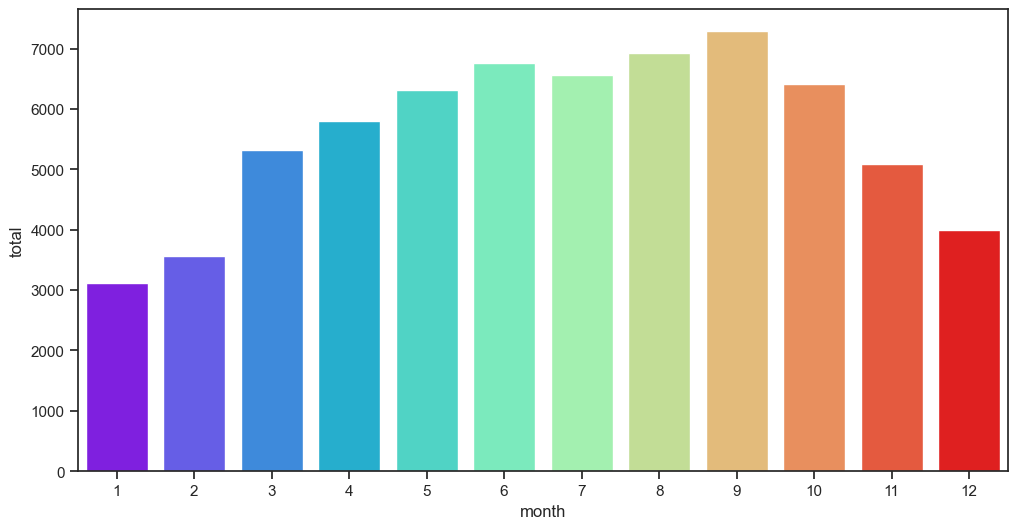

In [30]:
sns.set_theme(style='ticks') # style='white','whitegrid','dark','darkgird'
sns.barplot(data=df, x='month', y='total', errorbar=None, hue='month', palette='rainbow', legend=False)
plt.show()

### 2. 폰트 설정하기 : 특히 한글 폰트 설정하는 법

1. Windows
    ```python
    set_theme(style='white', font='Malgun Gothic')
    ```


2. Mac
    ```python
    set_theme(style='white', font='AppleGothic')
    ```


3. 폰트 사이즈 설정하기
    - 기본 크기 보다 더 작게
        ```python

        set_theme(style='white', font='AppleGothic', font_scale=(0~1))
        ```
    - 기본 크기 보다 더 크게
        ```python
        set_theme(style='white', font='AppleGothic', font_scale=(1~))
        ```

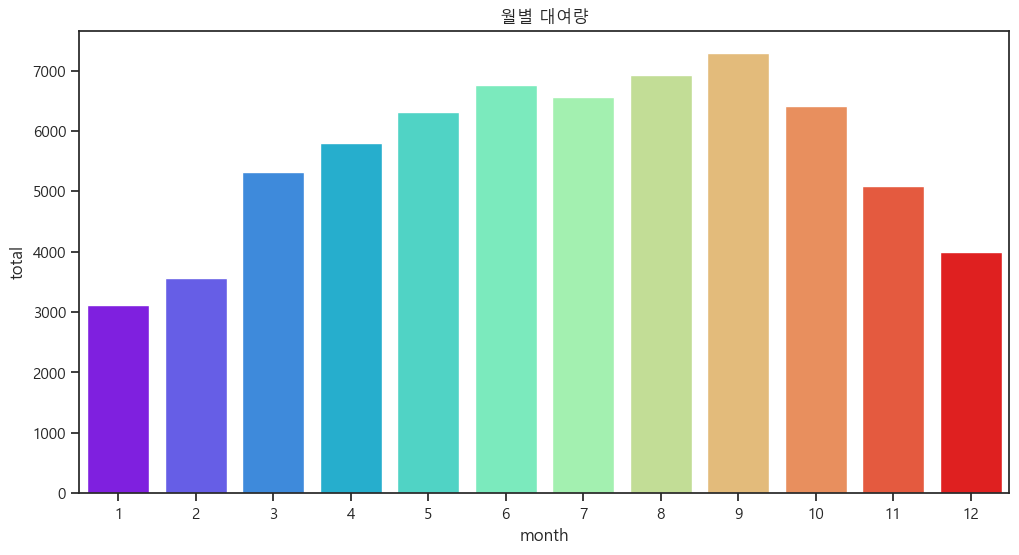

In [34]:
sns.set_theme(style='ticks', font='Malgun Gothic', font_scale=1) # style='white','whitegrid','dark','darkgird'
sns.barplot(data=df, x='month', y='total', errorbar=None, hue='month', palette='rainbow', legend=False)
plt.title("월별 대여량")
plt.show()

### 3. 팔레트(palette) 설정하기
- 사용할 물감을 미리 짜 놓는 팔레트 처럼, `그래프에서 사용할 색들의 집합`을 의미함.
- 기본 palette는 `'deep'`
    - 그 외에도, 'pastel', 'muted', 'bright', 'dark', 'colorblind'
    1. `set_theme()` : 전역 그래프의 팔레트 지정
    2. `특정 그래프의 옵션` : 특정 그래프의 팔레트 지정

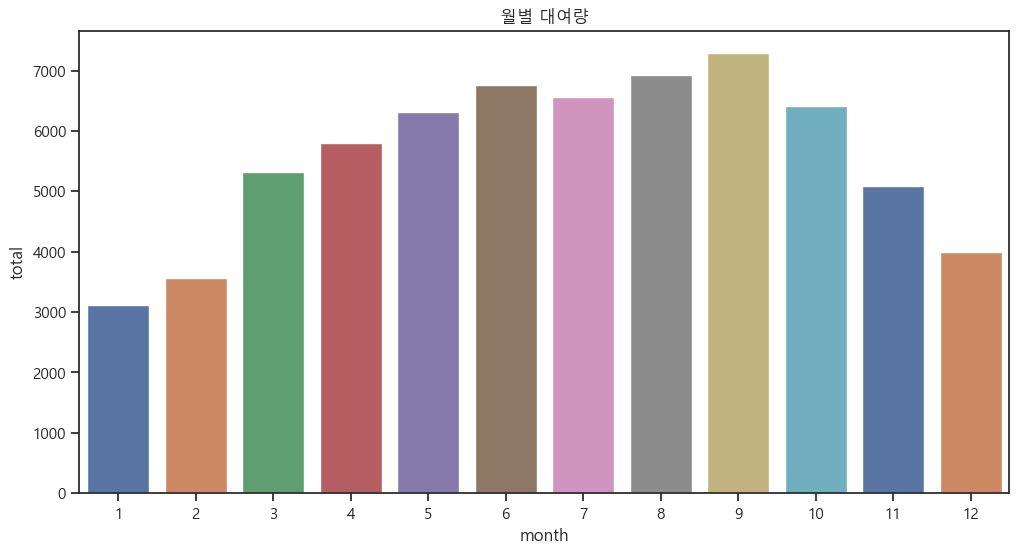

In [37]:
sns.set_theme(style='ticks', font='Malgun Gothic', font_scale=1) # style='white','whitegrid','dark','darkgird'
sns.barplot(data=df, x='month', y='total', errorbar=None, palette='deep', hue='month', legend=False)
plt.title("월별 대여량")
plt.show()

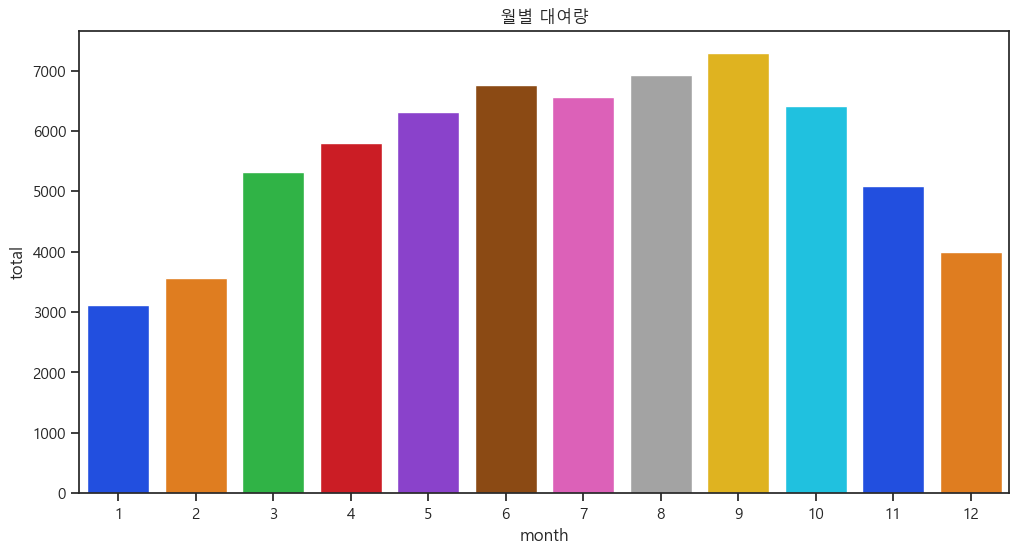

In [39]:
sns.set_theme(style='ticks', font='Malgun Gothic', font_scale=1) # style='white','whitegrid','dark','darkgird'
sns.barplot(data=df, x='month', y='total', errorbar=None, palette='bright', hue='month', legend=False)
plt.title("월별 대여량")
plt.show()

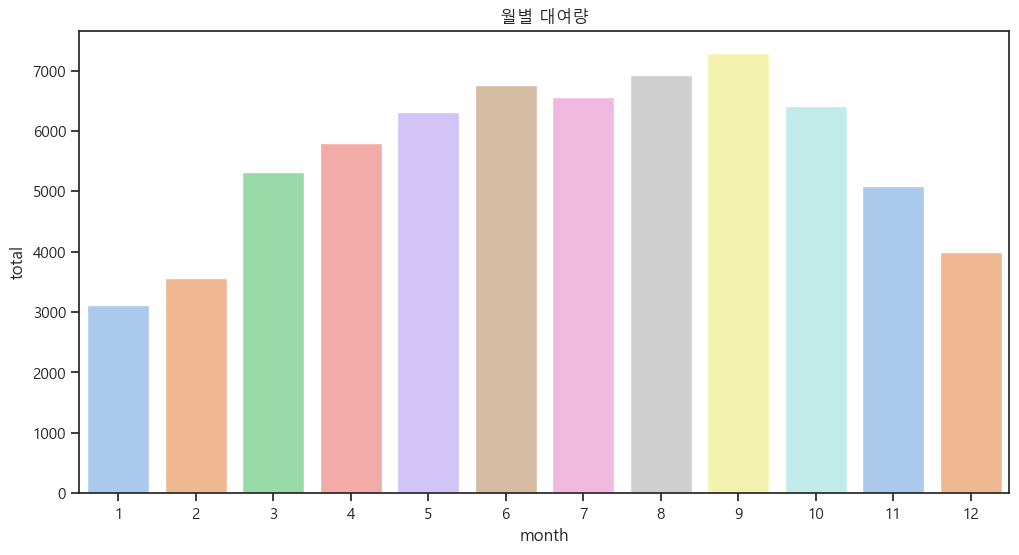

In [41]:
sns.set_theme(style='ticks', font='Malgun Gothic', font_scale=1) # style='white','whitegrid','dark','darkgird'
sns.barplot(data=df, x='month', y='total', errorbar=None, palette='pastel', hue='month', legend=False)
plt.title("월별 대여량")
plt.show()

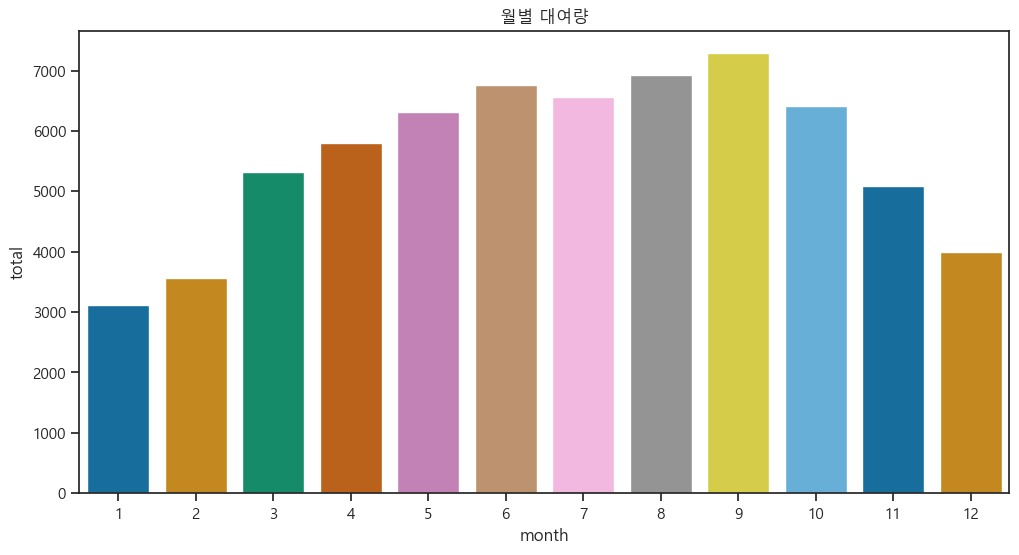

In [42]:
sns.set_theme(style='ticks', font='Malgun Gothic', font_scale=1) # style='white','whitegrid','dark','darkgird'
sns.barplot(data=df, x='month', y='total', errorbar=None, palette='colorblind', hue='month', legend=False)
plt.title("월별 대여량")
plt.show()

### 4. 그래프 크기 조절하기
- `rc` (runtime configuration)
    - 그래프 기본 설정을 담당하는 dict 안에 `키:값`으로 지정하여 사용하면 됩니다.
        ```python
        sns.set_theme(rc={'figure.figsize':(12,6)})
        ```

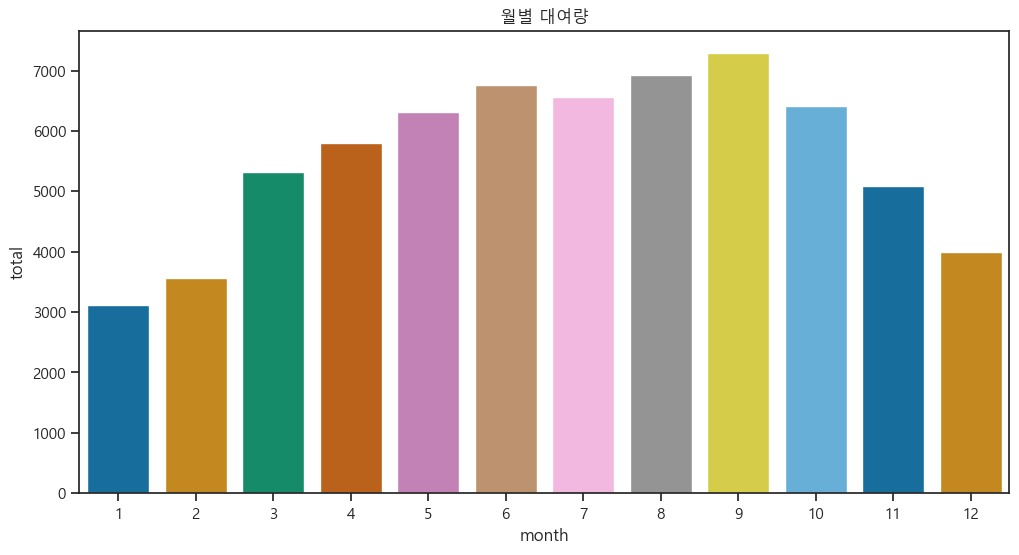

In [44]:
sns.set_theme(style='ticks', font='Malgun Gothic', font_scale=1, rc={'figure.figsize':(12,6)}) # style='white','whitegrid','dark','darkgird'
sns.barplot(data=df, x='month', y='total', errorbar=None, palette='colorblind', hue='month', legend=False)
plt.title("월별 대여량")
plt.show()

## 2. 데이터 분포 시각화 1

### stripplot, swarmplot

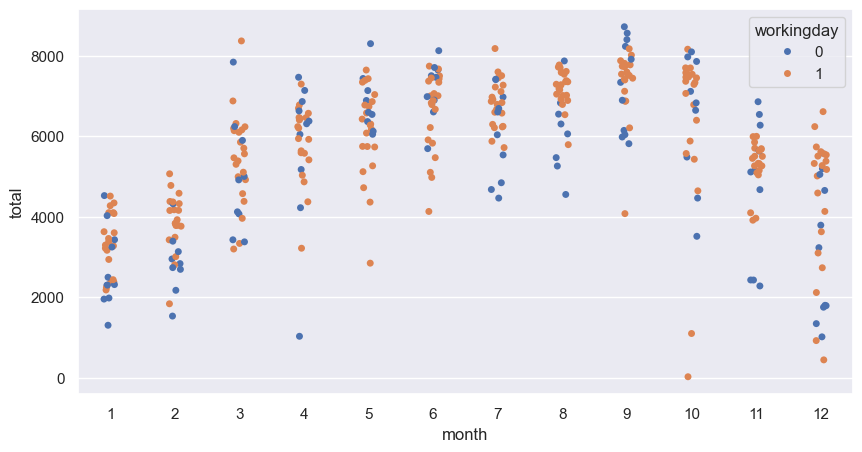

In [59]:
sns.stripplot(data=df, x='month', y='total', hue='workingday', jitter=True)
plt.show()
# jitter를 안쓰게 되면 데이터들이 너무 겹쳐보여서 확인하기 힘들다, 
# jitter를 쓰면 약간의 노이즈를 추가해줘서 좀 더 시각적으로 확인하기 편하다

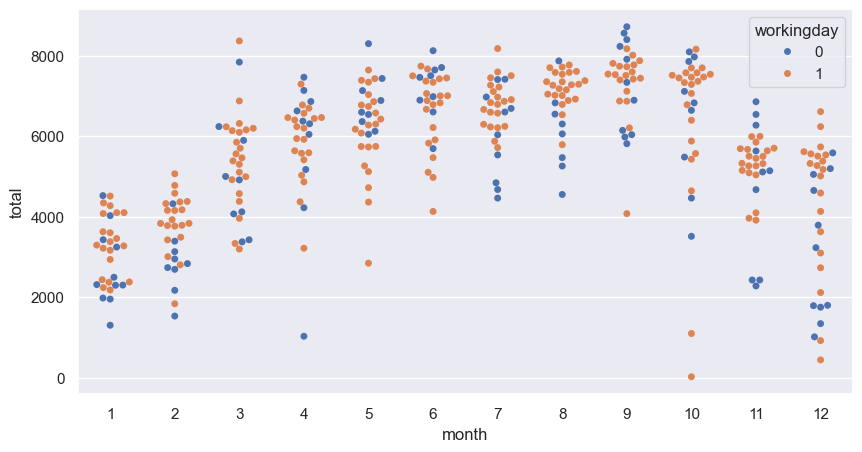

In [60]:
sns.swarmplot(data=df, x='month', y='total', hue='workingday')
plt.show()

### boxplot

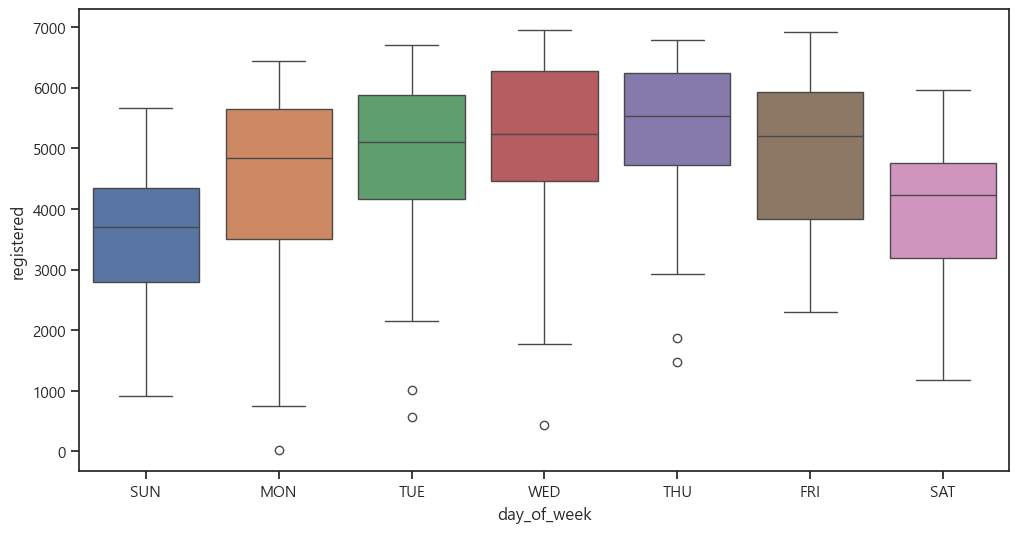

In [45]:
sns.boxplot(data=df, x='day_of_week', y='registered', hue='day_of_week')
plt.show()

### violinplot

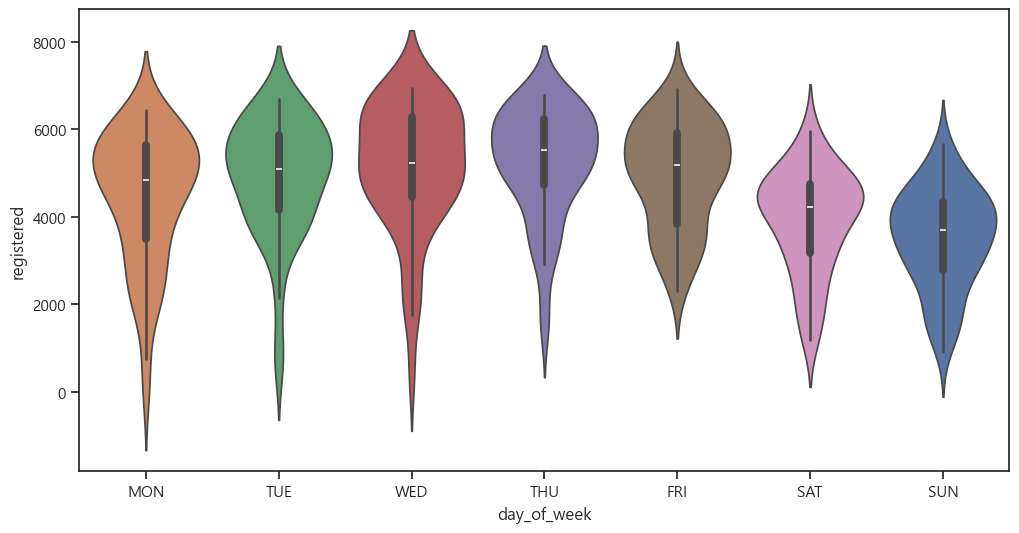

In [46]:
sns.violinplot(data=df, x='day_of_week', y='registered'
               , order=['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
               , hue='day_of_week')
plt.show()

## 3. 데이터 분포 시각화 2

### histplot

- `histplot` : 그냥 히스토그램, 한 가지 변수에 대해, 빈도를 살펴보는 그래프

    - x만 지정해주면 됩니다.
        - 예를 들어, 정기권을 대여하는 사람들이 하루에 몇 번을 대여하는지 빈도 분포를 볼 수 있다.
    - `bins` : 막대의 개수
        - pandas : hist는 bin **기본값 10개**
        - seaborn : 데이터의 특성에 따라 **동적**
    - `multiple` : 여러 데이터 집합을 동시에 시각화할 때, 표현 선택 옵션
        1. layer : 기본값, 겹쳐서 표현
        2. stack : 쌓아서 표현
        3. dodge : 옆으로 나란히 배치, 비교
        4. fill : 전체를 채워서, 비율로 표현

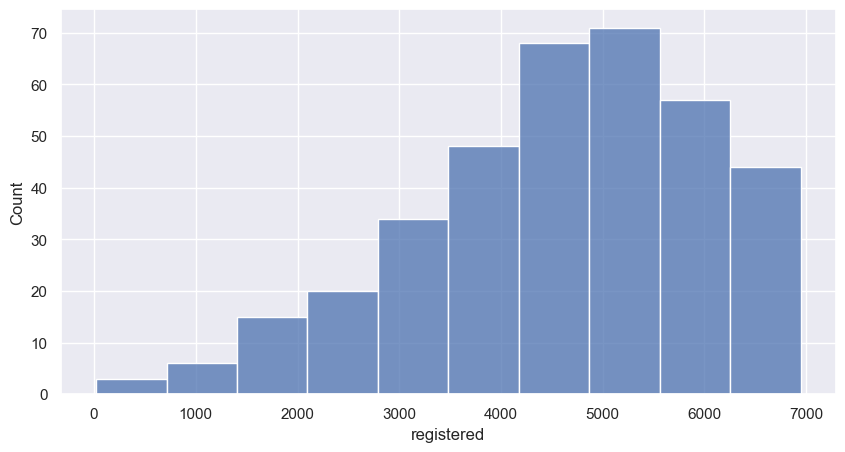

In [50]:
sns.set_theme(rc={'figure.figsize':(10, 5)})
sns.histplot(data=df, x='registered', bins=10, multiple='stack')
plt.show()

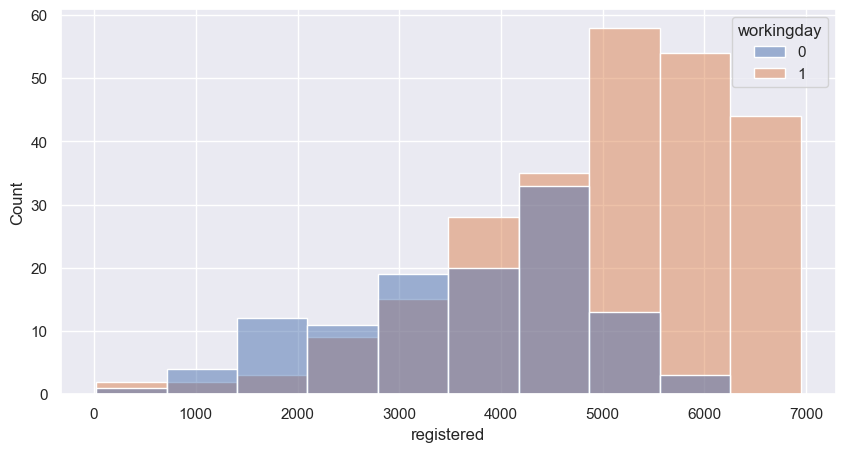

In [55]:
sns.set_theme(rc={'figure.figsize':(10, 5)})
sns.histplot(data=df, x='registered', bins=10, multiple='layer', hue='workingday')
plt.show()

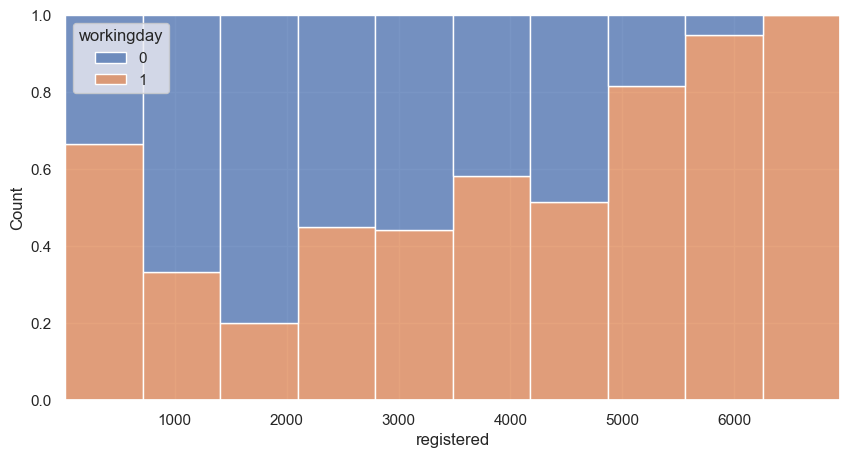

In [57]:
sns.histplot(data=df, x='registered', bins=10, hue='workingday', multiple='fill')
plt.show()

## 4. 상관관계 시각화

### Correlation Coefficient

상관계수는 -1 ~ +1 사이의 값을 가진다.
 - -1에 가까울수록 음의 상관관계가 강함
 - 0에 가까울수록 상관관계가 없다
 - 1에 가까울수록 양의 상관관계가 강함

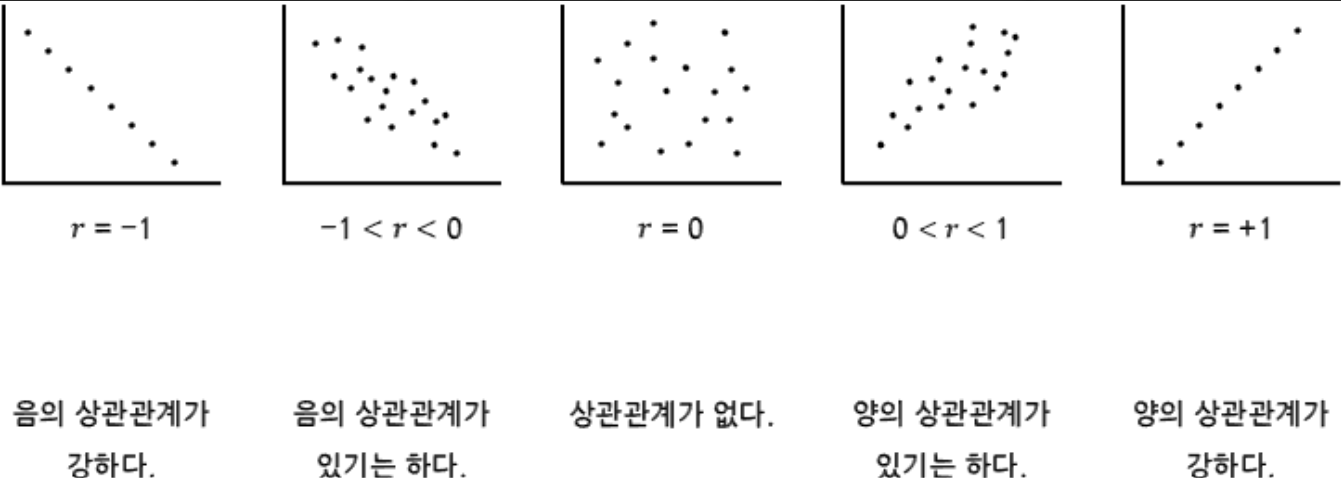

In [61]:
df.head()

,month,day,quarter,day_of_week,workingday,holiday,temperature,humidity,windspeed,registered,casual,total
0,1,1,1Q,SUN,0,0,21.4,72,12,1608,686,2294
1,1,2,1Q,MON,0,1,15.0,44,19,1707,244,1951
2,1,3,1Q,TUE,1,0,7.6,39,23,2147,89,2236
3,1,4,1Q,WED,1,0,0.4,35,11,2273,95,2368
4,1,5,1Q,THU,1,0,14.2,49,6,3132,140,3272


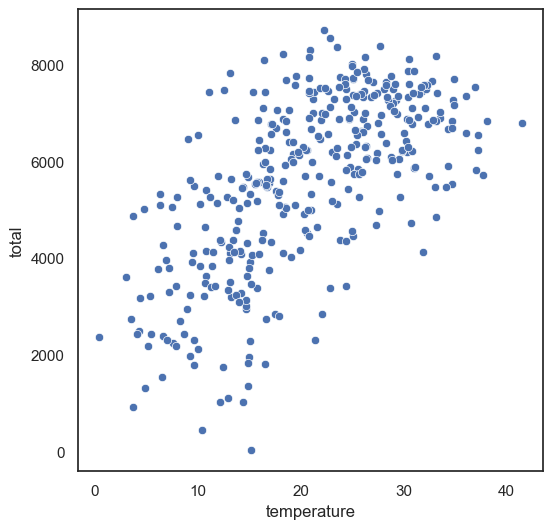

In [62]:
sns.set_theme(rc={'figure.figsize':(6, 6)}, style='white')
sns.scatterplot(data=df, x='temperature', y='total')
plt.show()

 - 날씨가 추워질수록 이용량이 줄어들고, 기온이 오를수록 이용량이 많아진다!

### `regplot` : regression
    - 회귀분석
    - 회귀선

**양의 상관관계**

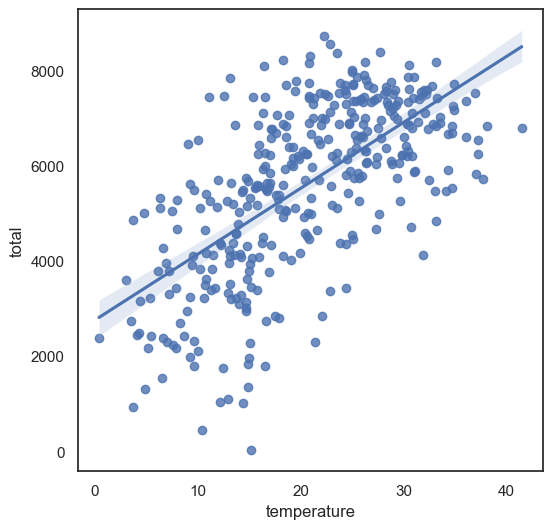

In [63]:
sns.regplot(data=df, x='temperature', y='total')
plt.show()

**음의 상관관계**

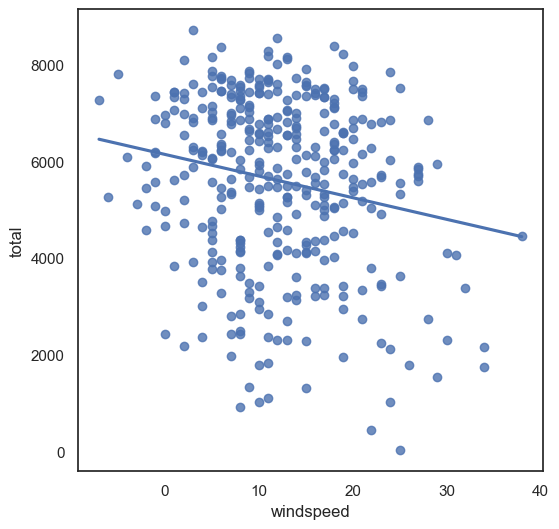

In [66]:
sns.regplot(data=df, x='windspeed', y='total', ci=False)
plt.show()

**상관관계 없음**

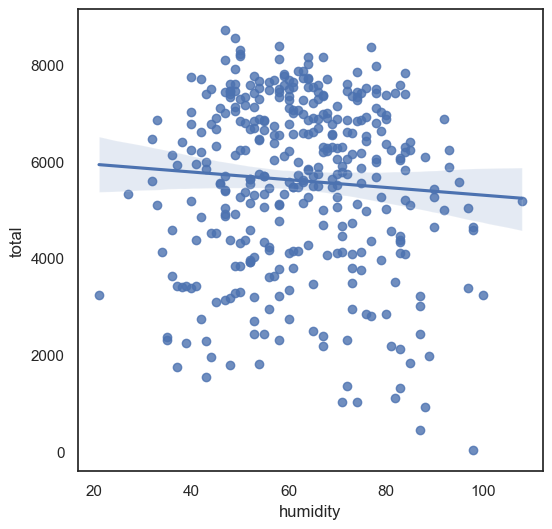

In [67]:
sns.regplot(data=df, x='humidity', y='total')
plt.show()

### 피어슨 상관계수(Pearson correlation coefficient)

상관계수는 수치형 변수에서만 구할 수 있다. 범주형에서는 구할 수 없다.

따라서 df.corr(numeric_only=True)라고 인자를 넣어줘야 한다.

In [68]:
pd.__version__

'2.2.2'

In [69]:
df.corr(numeric_only=True)

,month,day,workingday,holiday,temperature,humidity,windspeed,registered,casual,total
month,1.000000,0.006443,-0.007513,0.006258,0.128435,0.191763,-0.043407,0.281855,0.099117,0.266502
day,0.006443,1.000000,0.022520,-0.031464,0.006938,0.092935,0.024777,-0.055827,-0.019697,-0.052814
workingday,-0.007513,0.022520,1.000000,-0.258418,0.029387,0.043649,-0.072115,0.437003,-0.539919,0.118884
holiday,0.006258,-0.031464,-0.258418,1.000000,-0.019713,-0.023121,0.057260,-0.164190,0.029720,-0.118134
temperature,0.128435,0.006938,0.029387,-0.019713,1.000000,0.087400,-0.114972,0.554088,0.477538,0.643860
humidity,0.191763,0.092935,0.043649,-0.023121,0.087400,1.000000,-0.221569,-0.049545,-0.066836,-0.067814
windspeed,-0.043407,0.024777,-0.072115,0.057260,-0.114972,-0.221569,1.000000,-0.182959,-0.104406,-0.189995
registered,0.281855,-0.055827,0.437003,-0.164190,0.554088,-0.049545,-0.182959,1.000000,0.274984,0.912994
casual,0.099117,-0.019697,-0.539919,0.029720,0.477538,-0.066836,-0.104406,0.274984,1.000000,0.643305
total,0.266502,-0.052814,0.118884,-0.118134,0.643860,-0.067814,-0.189995,0.912994,0.643305,1.000000


수치형 변수 값들 각각의 상관계수가 전부 나오게 된다

select_dtypes로 직접 추출해서 상관계수를 구할 수 있다.

In [70]:
numeric_df = df.select_dtypes(include=[float, int]) # 수치형 데이터만 사용
numeric_df.corr()

,month,day,workingday,holiday,temperature,humidity,windspeed,registered,casual,total
month,1.000000,0.006443,-0.007513,0.006258,0.128435,0.191763,-0.043407,0.281855,0.099117,0.266502
day,0.006443,1.000000,0.022520,-0.031464,0.006938,0.092935,0.024777,-0.055827,-0.019697,-0.052814
workingday,-0.007513,0.022520,1.000000,-0.258418,0.029387,0.043649,-0.072115,0.437003,-0.539919,0.118884
holiday,0.006258,-0.031464,-0.258418,1.000000,-0.019713,-0.023121,0.057260,-0.164190,0.029720,-0.118134
temperature,0.128435,0.006938,0.029387,-0.019713,1.000000,0.087400,-0.114972,0.554088,0.477538,0.643860
humidity,0.191763,0.092935,0.043649,-0.023121,0.087400,1.000000,-0.221569,-0.049545,-0.066836,-0.067814
windspeed,-0.043407,0.024777,-0.072115,0.057260,-0.114972,-0.221569,1.000000,-0.182959,-0.104406,-0.189995
registered,0.281855,-0.055827,0.437003,-0.164190,0.554088,-0.049545,-0.182959,1.000000,0.274984,0.912994
casual,0.099117,-0.019697,-0.539919,0.029720,0.477538,-0.066836,-0.104406,0.274984,1.000000,0.643305
total,0.266502,-0.052814,0.118884,-0.118134,0.643860,-0.067814,-0.189995,0.912994,0.643305,1.000000


#### 피어슨 상관계수 해석

 - 온도와 총 대여수는 양의 상관관계이다. 0.64
 - 온도와 정기권 등록은 양의 상관관게이다. 0.55

In [75]:
# 토탈의 상관계수를 오름차순으로 정렬
numeric_df.corr()['total'].sort_values(ascending=True).drop('total')

windspeed     -0.189995
holiday       -0.118134
humidity      -0.067814
day           -0.052814
workingday     0.118884
month          0.266502
casual         0.643305
temperature    0.643860
registered     0.912994
Name: total, dtype: float64

#### 상관계수 시각화

<Axes: >

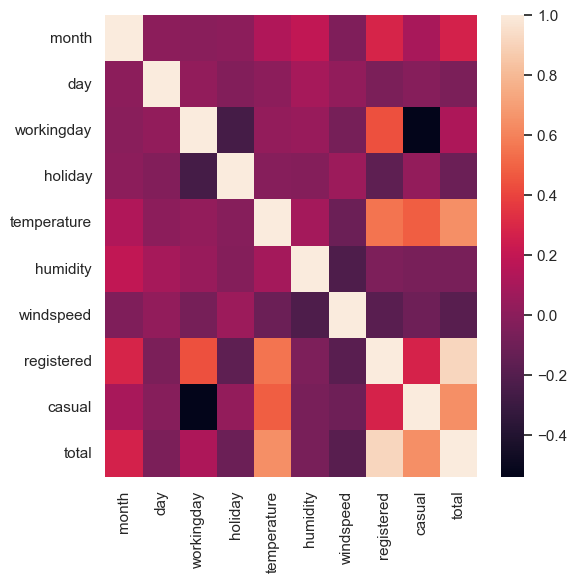

In [72]:
sns.heatmap(numeric_df.corr())

<Axes: >

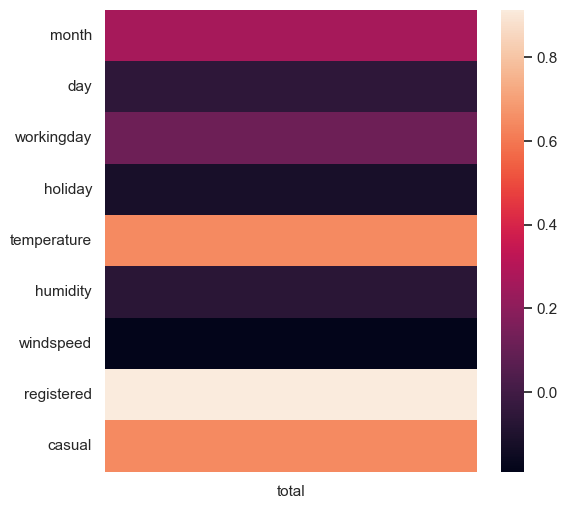

In [74]:
# 특정 열의 상관 관계만 추출
column_corr = numeric_df.corr()[['total']].drop('total', axis=0)
sns.heatmap(column_corr)